Running VGG Deep Learning Algorithm on a standard CIFAR Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
import tarfile
import pickle

In [2]:
def load_cifar10_from_tar(file_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        train_data = []
        train_labels = []
        for i in range(1, 6):
            file = tar.extractfile(f'cifar-10-batches-py/data_batch_{i}')
            batch = pickle.load(file, encoding='bytes')
            train_data.append(batch[b'data'])
            train_labels.extend(batch[b'labels'])
        
        train_data = np.vstack(train_data).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        train_labels = np.array(train_labels)
        
        file = tar.extractfile('cifar-10-batches-py/test_batch')
        test_batch = pickle.load(file, encoding='bytes')
        test_data = test_batch[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        test_labels = np.array(test_batch[b'labels'])
        
    return (train_data, train_labels), (test_data, test_labels)

In [3]:
(X_train, y_train), (X_test, y_test) = load_cifar10_from_tar('cifar-10-python.tar.gz')

In [4]:
subset_size_train = 5000  
subset_size_test = 2000   

X_train = X_train[:subset_size_train]
y_train = y_train[:subset_size_train]
X_test = X_test[:subset_size_test]
y_test = y_test[:subset_size_test]


In [5]:
#normalizing values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
if len(y_train.shape) == 1:
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
#defining the model
def SmallVGG(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    
    # Block 3
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    
    # Fully connected layers
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model


In [7]:
model = SmallVGG()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,733,130 (37.13 MB)

 Trainable params: 9,733,130 (37.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 320ms/step - accuracy: 0.5725 - loss: 1.1785 - val_accuracy: 0.4965 - val_loss: 1.4099
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 314ms/step - accuracy: 0.5777 - loss: 1.1223 - val_accuracy: 0.5265 - val_loss: 1.3740
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.6524 - loss: 0.9777 - val_accuracy: 0.5255 - val_loss: 1.4087
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 313ms/step - accuracy: 0.6754 - loss: 0.8969 - val_accuracy: 0.5315 - val_loss: 1.4225
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 319ms/step - accuracy: 0.7282 - loss: 0.7551 - val_accuracy: 0.5360 - val_loss: 1.4950
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 329ms/step - accuracy: 0.7492 - loss: 0.6788 - val_accuracy: 0.5400 - val_loss: 1.4881
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 350ms/step - accuracy: 0.7872 - loss: 0.6274 - val_accuracy: 0.5180 - val_loss: 1.7149
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 345ms/step - accuracy: 0.8130 - loss: 0

In [12]:
print("Model Accuracy: ", history.history['accuracy'][-1]*100,"%")

Model Accuracy:  95.03999948501587 %


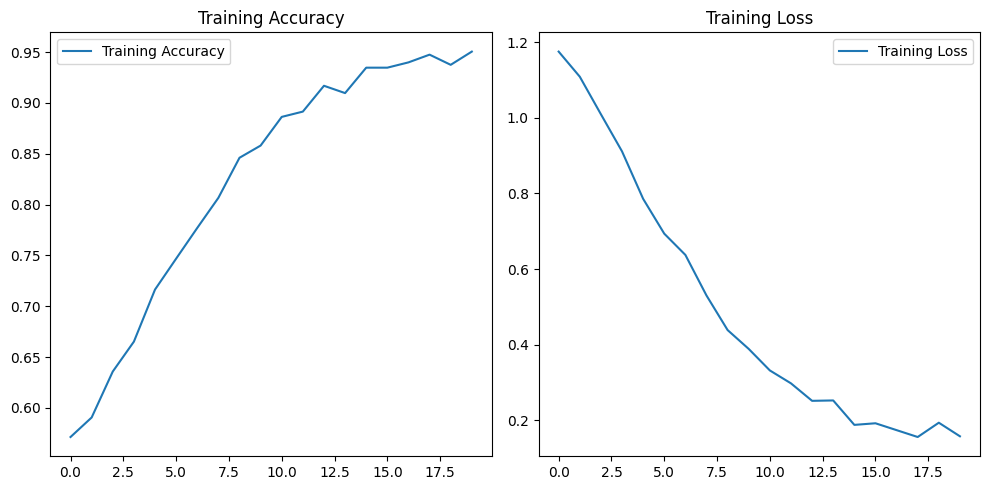

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
def plot_images(images, true_labels, pred_labels, class_names):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(n*2, 2))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')
        true_label = class_names[np.argmax(true_labels[i])]
        pred_label = class_names[np.argmax(pred_labels[i])]
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
    plt.tight_layout()
    plt.show()

Making Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


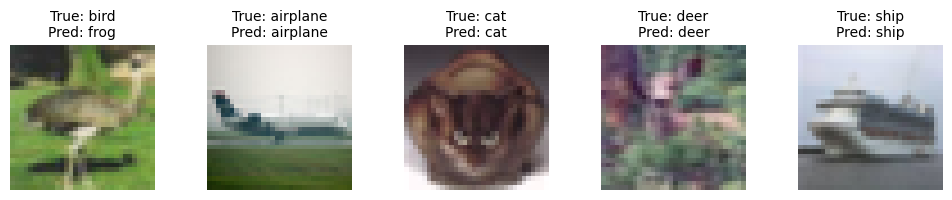

In [26]:
num_images_to_plot = 5
sample_indices = np.random.choice(len(X_test), num_images_to_plot, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

predictions = model.predict(sample_images)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plot_images(sample_images, sample_labels, predictions, class_names)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


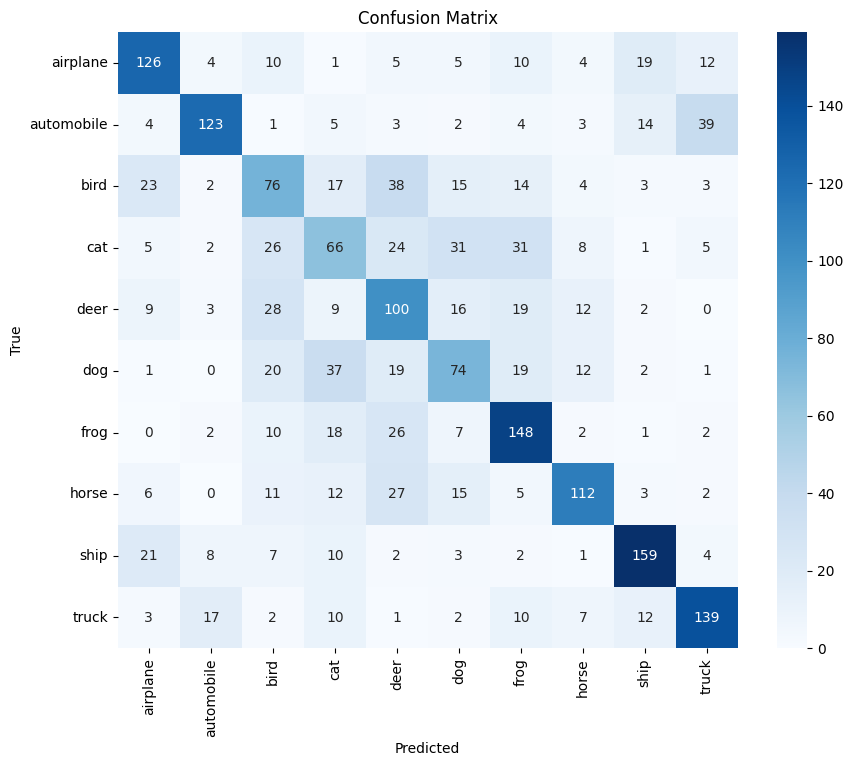

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.64      0.64      0.64       196
  automobile       0.76      0.62      0.69       198
        bird       0.40      0.39      0.39       195
         cat       0.36      0.33      0.34       199
        deer       0.41      0.51      0.45       198
         dog       0.44      0.40      0.42       185
        frog       0.56      0.69      0.62       216
       horse       0.68      0.58      0.63       193
        ship       0.74      0.73      0.73       217
       truck       0.67      0.68      0.68       203

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.57      0.56      0.56      2000

